#### Sequential Learning App for Materials Discovery - *SLAMD*

In [1]:
#Imports
from ipywidgets import Box,Label,Text,FloatText,BoundedFloatText,Checkbox,ToggleButtons,Dropdown,VBox,HBox,Accordion,BoundedIntText,SelectMultiple,RadioButtons,FloatRangeSlider,Button,IntSlider,Label,Tab,Output,FileUpload,Layout,FloatSlider
from IPython.display import display,Markdown,HTML
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance_matrix
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as SKRFR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn import preprocessing
from lolopy.learners import RandomForestRegressor
from operator import add

In [2]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Tab
tab =Tab() 

In [4]:
#Outputs
out=Output()
out_plotting=Output()
out_settings=Output()
out_algo=Output()
out_perform_experiment=Output()
out_input_space=Output()
out_res=Output()
out_iter_aut=Output()
out_results_SL=Output()
out_app=Output()

In [5]:
#File Upload
up = FileUpload(accept="", multiple=False)

In [6]:
#Upload Properties 
delim =RadioButtons(
    options=[',', ';',' '],
    description='Separator: ',
    disabled=False)
delim_dec = RadioButtons(
    options=['.', ','],
    description='Decimal delim: ',
    disabled=False)

eraser = SelectMultiple(
    options=['tab','"',"%"],
    value=['tab'],
    #rows=10,
    description='Eraser: ',
    disabled=False)
rows = IntSlider(
    value=0,
    step=1,
    description='# of lines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

In [7]:
#Data Info 
toggle = ToggleButtons(
    options=['Preview  ', 'Info  ', 'Stats  '],
    description='Options',
    disabled=False,
    button_style='warning',
    icons=['search', 'info', 'tachometer'])

In [8]:
#Selection of Targets and Features
feature_selector=SelectMultiple(
    options=[],
    description='',
    disabled=False,
    layout=Layout(width='50%')) 

feature_selector_application=SelectMultiple(
    options=[],
    description='',
    disabled=False,
    layout=Layout(width='50%')) 

target_selection=SelectMultiple(
    options=[],
    placeholder='Select the target variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))

target_selection_application=SelectMultiple(
    options=[],
    placeholder='Select the target variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))


fixed_target_selection=SelectMultiple(
    options=[],
    placeholder='Select the target variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))

fixed_target_selection_application=SelectMultiple(
    options=[],
    placeholder='Select the target variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))


In [9]:
#Plotting
selector_plot_variable=SelectMultiple(
    options=[],
    description='Features',
    disabled=False,
    layout=Layout(width='50%'))
graph_type = Dropdown(
    options=['Choose graph type','Scatter', 'Scatter Matrix', 'Correlation Heatmap'],
    value='Choose graph type',
    description='Graph type:',
    disabled=False,
    layout=Layout(width='50%'))
x_axis = Dropdown(
    options=[''],
    value='',
    description='X-Axis:',
    disabled=False)
y_axis = Dropdown(
    options=[''],
    value='',
    description='Y-Axis:',
    disabled=False)

select_x=Dropdown(
    options=[''],
    value='',
    placeholder='select X-axis',
    description='X-Axis:',
    disabled=False,
    layout=Layout(width='50%'))

select_y=Dropdown(
    options=[''],
    value='',
    placeholder='select Y-axis',
    description='Y-Axis:',
    disabled=False,
    layout=Layout(width='50%'))

select_hue=Dropdown(
    options=[''],
    value='',
    placeholder='select the hue',
    description='Hue:',
    disabled=False,
    layout=Layout(width='50%'))

select_size=Dropdown(
    options=[''],
    value='',
    placeholder='select the size',
    description='Size:',
    disabled=False,
    layout=Layout(width='50%'))

container_checkboxes_targets=VBox([])
container_checkboxes_fixed_targets=VBox([])

container_slider_targets=VBox([])
container_slider_fixed_targets=VBox([])

box_targets=VBox([])
box_fixed_targets=VBox([])



In [10]:
#Sequential Learning Properties
select_strategy=Dropdown(
    options=['MEI (exploit)','MU (explore)','MLI (explore & exploit)','MEID (exploit)','MLID (explore & exploit)'],
    value='MEI (exploit)',
    placeholder='select the strategy',
    description='Strategy:',
    disabled=False,
    layout=Layout(width='50%'))

select_model=Dropdown(
    options=['lolo Random Forrest (RF)','Decision Trees (DT)','Random Forrest (RFscikit)','Gaussian Process Regression (GPR)'],
    value='Gaussian Process Regression (GPR)',
    placeholder='select the Model',
    description='Model:',
    disabled=False,
    layout=Layout(width='50%'))

In [11]:
#Buttons


button_upload =Button(
    description='Upload',
    disabled=False,
    button_style='success',
    tooltip='Click to Upload',
    icon='check',
    layout=Layout(width='50%'))

button_preview = Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to preview',
    icon='search',
    layout=Layout(width='50%'))

button_plot = Button(
    description='Plot',
    disabled=False,
    button_style='warning',
    tooltip='Click to Plot',
    icon='pencil',
    layout=Layout(width='100%'))

button_show_DS=Button(
    description='Visualize settings',
    disabled=False,
    button_style='success',
    tooltip='Plots materials data in TSNE coordinates and colored targets',
    icon='search',
    layout=Layout(width='50%',height ='inherit'))

button_confirm_plot_var=Button(
    description='Confirm selection',
    disabled=False,
    button_style='success',
    tooltip='Confirm the selected target variable',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_plot_comparision=Button(
    description='Compare',
    disabled=False,
    button_style='warning',
    tooltip='Simplify the Columns',
    icon='fa-bar-chart',
    layout=Layout(width='50%'))

button_confirm_options=Button(
    description='Confirm options ',
    disabled=False,
    button_style='success',
    tooltip='Confirm options',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))
                           
button_perform_experiment=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))
button_application=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))


run_button_aut=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform Experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))

run_button_aut_template=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform Experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))

confirm_import_button=Button(
    description='Confirm import ',
    disabled=False,
    button_style='success',
    tooltip='Confirm selected Strategy',
    icon='check',
layout=Layout(width='50%',height ='inherit'))

preview_settings_button=Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to Preview',
    icon='search',
layout=Layout(width='50%'))

In [12]:
#Layout File Upload Tab

accordion = Accordion(children=[
    up, 
    HBox([delim, delim_dec, eraser]), 
    rows])

accordion.set_title(0, 'File Selection')
accordion.set_title(1, 'Delimiter')
accordion.set_title(2, 'Skip Rows')


accordion_box = VBox([
    accordion, 
    HBox([button_preview, button_upload ]),
    out
])



In [13]:
#Plotting Tab

container_plot_options= VBox([])
button_container=HBox([button_plot])

plotting=VBox(children=[VBox( [
        HBox([graph_type]),
        container_plot_options,
        button_container,
        out_plotting
        ]
)])


In [14]:
#Sequential Learning Tab 

slider_of_for_dist=FloatSlider(
    value=100,
    min=0,
    max=100,
    step=1,
    description='Prediction quantile for distance-based utility (smaller values recommended for weak predictors).:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)

slider_of_for_std=FloatSlider(
    value=1,
    min=0.1,
    max=5,
    step=0.1,
    description='σ Factor (to controll the weigth of uncertainty):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)
quantile_tar_slider= FloatSlider(
    value=100,
    min=1,
    max=100,
    step=1,
    description='Target Quantile:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)



initial_sample_size_text=BoundedIntText(
    value=8,
    min=2,
    max=100,
    step=1,
    description='Initial Sample Set Size:',
    disabled=False,
    layout=Layout(width='50%')

)

batch_size_text=BoundedIntText(
    value=1,
    min=1,
    max=100,
    step=1,
    description='Batch Size',
    tooltip='# of simultanious experiments',
    disabled=False,
    layout=Layout(width='50%')

)

box_features_slider=VBox([])


plottingDS=VBox(children=[VBox( [
        
        out_input_space
    ]
)])

DataPre_sl=VBox([
        HBox([Label('Materials Data (Input)', font=('bold'), layout=Layout(width='50%', height='80px')),(feature_selector)]),
        HBox([Label('Target Properties', font=('bold'),layout=Layout(width='50%', height='80px')),target_selection]),
        box_targets,
        HBox([Label('A-priori Information', font=('bold'),layout=Layout(width='50%', height='80px')),fixed_target_selection]),
        box_fixed_targets,
        HBox([quantile_tar_slider,button_show_DS]),
        plottingDS    
])


    
DataPre=VBox([
        HBox([feature_selector]),
        HBox([target_selection]),
        box_targets,
        HBox([fixed_target_selection]),
        box_fixed_targets,
       ])

iterations=IntSlider(
    value=25,
    min=1,
    max=100,
    step=1,
    description='# of SL runs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='100%')
)

custom_container=VBox([HBox([])])
results_container=VBox([HBox([])])
InitSampCon_container=HBox([initial_sample_size_text,batch_size_text])

strategy_container=HBox([select_strategy])


start_and_stop_sl_container=HBox([button_perform_experiment])

sl_settings= VBox([Label('Configure Experiments'),
                   Label(' '),
                   iterations,
                   InitSampCon_container,
                   Label(' '),
                   Label(' '),
                   Label('Configure Algorithm'),
                   Label(' '),
                   custom_container,
                   select_model,
                   strategy_container,
                   start_and_stop_sl_container,
                   Label(' '),
                   Label(' '),
                   Label('SL Status'),
                   out_perform_experiment,
    
])

#initial_sample_size_text

sl_results= VBox([
    out_results_SL
])


sl_accordion=Accordion(children=[DataPre_sl,sl_settings,sl_results])
sl_accordion.set_title(0,"Configure Optimization")
sl_accordion.set_title(1,"Sequential Learning")
sl_accordion.set_title(2,"Results")



In [15]:
#Sequential Learning Application Tab 

DataPre_slA=VBox([
        HBox([Label('Materials Data (Input)', font=('bold'), layout=Layout(width='50%', height='80px')),(feature_selector_application)]),
        HBox([Label('Target Properties', font=('bold'),layout=Layout(width='50%', height='80px')),target_selection_application]),
        box_targets,
        HBox([Label('A-priori Information', font=('bold'),layout=Layout(width='50%', height='80px')),fixed_target_selection_application]),
        box_fixed_targets,
        plottingDS    
])


    


custom_container=VBox([HBox([])])
results_container=VBox([HBox([])])


strategy_container=HBox([select_strategy])

start_and_stop_sl_container=HBox([button_application])

sl_settingsA= VBox([Label('Configure Experiments'),
                   Label(' '),
                   HBox([batch_size_text]),
                   Label(' '),
                   Label('Configure Algorithm'),
                   Label(' '),
                   custom_container,
                   select_model,
                   strategy_container,
                   start_and_stop_sl_container,
                   Label(' '),
                   Label('SL Status'),
                   #out_perform_experimentA,

])

#initial_sample_size_text

sl_resultsA= VBox([
    out_app
])

slA_accordion=Accordion(children=[DataPre_slA,sl_settingsA,sl_resultsA])
slA_accordion.set_title(0,"Configure Optimization")
slA_accordion.set_title(1,"Sequential Learning")
slA_accordion.set_title(2,"Results")

In [16]:
#Layout Tabs

children = [
    accordion_box, 
    VBox([toggle, out]),
    plotting,
    sl_accordion,
    #slA_accordion,
    
    
    
   ]

tab.children = children

In [17]:
#Naming Tabs

tab.set_title(0, "Upload")
tab.set_title(1, "Data Info")
tab.set_title(2, "Design Space Explorer")
tab.set_title(3, "Sequential Learning")
#tab.set_title(4, "Application")


In [18]:
#Utility Methods
def decide_max_or_min(source,columns,dataframe):
        row_list=[source.children[decide].children[0].value for decide in range(len(columns))]
        
    
        for column in range(len(columns)):
                            if (row_list[column] == "minimize"):
                                
                                dataframe[columns[column]]=dataframe[columns[column]]*(-1)
                            
        return dataframe
                                
                                
        
        
                              
                                
                                
def extend(list_of_2dms_arrays_to_extend):
    np_array=np.array(list_of_2dms_arrays_to_extend)
    max_cols=max(map(len,np_array))
    result_list=[]
    for i in np_array:
                    if(len(i) == max_cols):
                        result_list.append(i)
                    elif (len(i) != max_cols):
                        how_often=max_cols-len(i)
                        matrix_to_extend=np.tile(i[:][-1], (how_often, 1))
                        i=np.concatenate((i, matrix_to_extend))
                        result_list.append(i)
                    
   
    return result_list

    
           
def flatten_list(nested_list):
    for sublist in nested_list:
        flatlist=[element for element in sublist]  
    return flatlist


def import_settings():
    content= content_parser(import_button)
    settings = pd.read_csv(content, sep=',', index_col=False, decimal='.')
         
    return settings


def content_parser(source):
    if source.value == {}:
        """with out:
            out.clear_output
            display(Markdown('No CSV loaded'))
            #print('No CSV loaded')    """
    else:
        from io import StringIO
        typ, content = "", ""
        up_value = source.value
        for i in up_value.keys():
            typ = up_value[i]["metadata"]["type"]
            if typ == "text/csv" or typ == "application/vnd.ms-excel":
                content = up_value[i]["content"]
                content_str = str(content, 'utf-8')

                if eraser.value != {}: 
                    for val in eraser.value:
                        if val == "tab":
                            content_str = content_str.replace("\t","")
                        elif val =="%":
                            content_str = content_str.replace("\t","")
                        else:
                            content_str = content_str.replace(val,"")
                if content_str != "":
                    str_io = StringIO(content_str) 
                    return str_io
def df_converter():
    content = content_parser(up)
    if content is not None:
            df = pd.read_csv(content, sep=delim.value, index_col=False, skiprows=rows.value,decimal=delim_dec.value)
            df=df.apply(pd.to_numeric,errors="ignore")
            return df
    else:
        return None
def preview():
    
    df = df_converter()
    with out:
        out.clear_output()
        display(Markdown('Selected Targets'))
        
        if df is not None:
            display(Markdown(df.head(10).to_markdown()))
        else:
            display(Markdown('Configuration is wrong/missing...'))
            
def upload():
    
    df = df_converter()
    with out:
        out.clear_output()
        display(Markdown('This is how your uploaded data looks like:'))
       
        if df is not None:
            display(Markdown(df.head(10).to_markdown()))
            x_axis.options = df.columns
            y_axis.options = df.columns
            feature_selector.options= df.columns
            feature_selector_application.options= df.columns
            
            select_x.options=df.columns
            select_y.options=df.columns
            select_size.options=df.columns
            select_hue.options=df.columns
            selector_plot_variable.options=df.columns
            
            
        else:
            display(Markdown('Configuration is wrong/missing...'))

            
            
def create_download_link( df, title, filename): 
    import base64
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = html_buttons = '''<html>
    <head>
    <meta name="viewport" content="width=device-width, initial-scale=1">
    </head>
    <body>
    <a download="{filename}" href="data:text/csv;base64,{payload}" download>
    <button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">{title}</button>
    </a>
    </body>
    </html>
    '''
    html_button = html_buttons.format(payload=payload,filename=filename,title=title)
    return HTML(html_button)

            
            
def desc():
    info_level = toggle.value
    if info_level != {}:
        df = df_converter()
        with out:
            out.clear_output()
            display(Markdown('\n Data {} \n'.format(
                info_level)))
            if df is not None:
                if info_level == 'Info  ':
                    df.info()
                elif info_level == 'Stats  ':
                    display(Markdown(df.describe().to_markdown()))
                elif info_level == 'Preview  ':
                    display(Markdown(df.head(10).to_markdown()))
                else:
                    display(Markdown('Configuration is wrong/missing...'))
       




    


In [19]:
#Plotting Methods
import seaborn as sns

def plot():
    graph = graph_type.value
    if graph=="Scatter":
        plot_scatter()
    elif graph=="Correlation Heatmap":
            plot_heat()
    elif graph=="Scatter Matrix":
            plot_pairwise()
          
        
def plot_pairwise():
    df =confirm_var()
    with out_plotting:
        out_plotting.clear_output()
        sns.pairplot(df)
        plt.show()

def plot_heat():
    df = confirm_var()
    with out_plotting:
        out_plotting.clear_output()
        corr = df.corr()
        plt.figure(figsize=(12,7))
        sns.heatmap(corr, annot=True, cmap='Blues')
        b, t = plt.ylim()
        plt.ylim(b+0.5, t-0.5)
        plt.title("Feature Correlation Heatmap")
        plt.show()
            
def plot_scatter():
    data=df_converter()
    with out_plotting:
        out_plotting.clear_output()
        fig, ax = plt.subplots(figsize=(12,7))
        #not generic
        sns.scatterplot(y=select_y.value, x=select_x.value, hue=select_hue.value, size=select_size.value, data=data, ax=ax, sizes=(50, 300))
        ax.set_title(select_y.value+ "vs"+ select_x.value)
        ax.legend(loc="upper left", bbox_to_anchor=(1,1))
        plt.show()
        plt.close(fig)  

        


In [20]:

def confirm_options():
    items=box_features_slider.children
    df = df_converter()
    Y = df.loc[:,df.columns.isin(target_selection.value)]
    
    for slider in items:
            unt_grenz= slider.value[0]/100
            ob_grenz= slider.value[1]/100
            Y = Y[(Y >= Y.quantile(unt_grenz) ) & (Y <= Y.quantile(ob_grenz))]
            Y= Y.dropna()
    
    return Y   


def confirm_features(source):
    df = df_converter()
    train = source.value
    
    target_selection.options=df.columns[~df.columns.isin(feature_selector.value)]
    
    target_selection_application.options=df.columns[~df.columns.isin(feature_selector_application.value)]
    
    fixed_target_selection.options=df.columns[~df.columns.isin(target_selection.value)& ~df.columns.isin(feature_selector.value)]
    fixed_target_selection_application.options=df.columns[~df.columns.isin(target_selection_application.value)& ~df.columns.isin(feature_selector.value)]
    
    train = df.columns[df.columns.isin(source.value)]
    
    return train


def confirm_var():
    df= df_converter()
    selection = list(selector_plot_variable.value)
    var = df[selection]
 
    return var

  
def confirm_target(source):
    #target_selection
    df = df_converter()
    target = df.columns[df.columns.isin(source.value)]
    
    fixed_target_selection.options=df.columns[~df.columns.isin(source.value)& ~df.columns.isin(feature_selector.value)]
    
    fixed_target_selection_application.options=df.columns[~df.columns.isin(target_selection_application.value)& ~df.columns.isin(feature_selector_application.value)]
    
    
    return target 



def confirm_fixed_target(source):
    df = df_converter()
    fixed_target = df.columns[df.columns.isin(source.value)]
    return fixed_target

def confirm_strategy():
    strategy= select_strategy.value
    if strategy != {}:
            custom_container.children=[]
            return select_strategy.value


In [21]:
def create_slider_for_dist_quantile():
    strategy_container.children=[select_strategy,slider_of_for_dist]
    
def create_slider_for_dist_quantile_std():
    strategy_container.children=[select_strategy,slider_of_for_dist, slider_of_for_std]
        
def create_slider_for_std():
    strategy_container.children=[select_strategy,slider_of_for_std]
    
    
    
def create_dynamically_elems(targets):
    
    radiobuttons = [RadioButtons(
    options=['maximize', 'minimize'],
    value='maximize', 
    description=feature,
    disabled=False
    )
    for feature in targets]
    
    
    
    weights = [FloatText(
    value=1.,
    continuous_update=True,
    description="weight "+feature,
    disabled=False)
    for feature in targets]
    
    
    
    
    weights_np=np.array(weights)
    
    radiobuttons_np=np.array(radiobuttons)

    return radiobuttons_np,weights_np
    
    
    
def create_dynamically_checkboxes(targets):
    radiobuttons = [RadioButtons(
    options=['maximize', 'minimize'],
    value='maximize', 
    description=feature,
    disabled=False
    )
    for feature in targets]
    
    checkboxes = [Checkbox(
    value=False,
    description='Check to use treshhold',
    disabled=False,
    indent=False
)
    
    for feature in targets]
    
    
    slider = [FloatText(
    value=np.max(df_converter()[feature].to_numpy()),
    continuous_update=True,
    description=feature,
    disabled=False)
    
    for feature in targets]
    
    
    weights = [FloatText(
    value=1.,
    continuous_update=True,
    description="weight "+feature,
    disabled=False)
    for feature in targets]
    
    weights_np=np.array(weights)
    slider_np=np.array(slider)
    radiobuttons_np=np.array(radiobuttons)
    checkboxes_np=np.array(checkboxes)
    
    return radiobuttons_np,slider_np,checkboxes_np,weights_np
    
   




In [22]:
result_df = pd.DataFrame(columns=['Req. dev. cycle (mean)','Req. dev. cycle (std)','Req. dev. cycle (90%)',
                                  'Req. dev. cycle (max)','5 cycle perf.','10 cycle perf.','Batch size','Algorithm','Utlity function','σ factor',
                                  'qant. (distance utility)','# SL runs','Initial sample','# of samples in the DS',
                                  '# Features','# Targets', 'Target threshold','Features name','Targets name','A-priori information',
                                  'Req. experiments (list)'])



In [23]:
import functools
class targets():
    checkboxes=None
    radiobuttons=None
    slider=None
    not_stand_df=None
    idx=None
    min_at=set()
    minimize=False
    idxs=[]
    
    def __init__(self,container,selection,confirm_func,create_elem_func):
        self.container=container
        self.selection=selection
        
        self.confirm_func=confirm_func
        self.create_elem_func=create_elem_func
        
        
    def on_selection_change(self,change):
        self.confirm_func(self.selection)
        self.not_stand_df=df_converter()
        self.container.children=()
        selection_as_list=list(self.selection.value)
        
        if(self.create_elem_func==create_dynamically_checkboxes):
            
            self.radiobuttons,self.slider,self.checkboxes,self.weights=self.create_elem_func(selection_as_list)
            for row in range(len(self.radiobuttons)):
            
                self.container.children=(*self.container.children,HBox([self.radiobuttons[row],self.checkboxes[row],self.slider[row],self.weights[row]]))
                self.radiobuttons[row].observe(functools.partial(self.on_radiobutton_changed,row),names='value')
                self.checkboxes[row].observe(functools.partial(self.on_checkbox_checked,row),names='value')
                self.slider[row].observe(functools.partial(self.on_texfield_typed,row),names='value')
        else:
            
            self.radiobuttons,self.weights=self.create_elem_func(selection_as_list)
            
            for row in range(len(self.radiobuttons)):
                
                self.container.children=(*self.container.children,HBox([self.radiobuttons[row],self.weights[row]]))
                self.radiobuttons[row].observe(functools.partial(self.on_radiobutton_changed,row),names='value')


     
    def on_radiobutton_changed(self,row,change):
                
        if(self.radiobuttons[row].value=="minimize"):
            
            self.min_at.add(list(self.selection.value)[row])
            
            self.minimize=True
            
        else:
            self.min_at.remove(list(self.selection.value)[row])
            
            self.minimize=False
            
        if(self.create_elem_func==create_dynamically_checkboxes):
            self.on_checkbox_checked(row,change)
        
    def on_texfield_typed(self,row,change):
        self.checkboxes[row].value=False
        
    def on_checkbox_checked(self,row,change):
       
        selection_as_list=list(self.selection.value)
        if(self.checkboxes[row].value==True):
            
            idx=None
            
            max_df=np.max(df_converter()[selection_as_list[row]].to_numpy())
            min_df=np.min(df_converter()[selection_as_list[row]].to_numpy())
               
            
            if(self.slider[row].value>max_df):
                self.slider[row].value=max_df
            
            if(self.slider[row].value < min_df):
                self.slider[row].value=min_df
            
            
            if(self.minimize==True):
                df_mask=self.not_stand_df[selection_as_list[row]]<self.slider[row].value
            else:
                df_mask=self.not_stand_df[selection_as_list[row]]>=self.slider[row].value
                
                
            temp=self.not_stand_df
            
            if(len(temp[df_mask])==0):
                print("selection false,max min for this feature in this combination is: or change other targets")
            else:
                temp = self.not_stand_df[df_mask]
                idx = temp[df_mask].index
                
            #check if there is an old idx for this feature  
            
            for idx_tuples in self.idxs:
                if(idx_tuples[0]==selection_as_list[row]):
                    self.idxs.remove(idx_tuples)
            
            #append new idx in list
            
            self.idxs.append((selection_as_list[row],idx))
            
        
        
        if(self.checkboxes[row].value==False):
             for idx_tuples in self.idxs:
                if(idx_tuples[0]==selection_as_list[row]):
                    self.idxs.remove(idx_tuples)
            
            
        
        
                
            
        



In [24]:
t = targets(box_targets,target_selection,confirm_target,create_dynamically_checkboxes) 
ft = targets(box_fixed_targets,fixed_target_selection,confirm_fixed_target,create_dynamically_checkboxes)


tA = targets(box_targets,target_selection_application,confirm_target,create_dynamically_elems) 
ftA = targets(box_fixed_targets,fixed_target_selection_application,confirm_fixed_target,create_dynamically_elems)

In [25]:
class sequential_learning:
    
    
    dataframe = df_converter()
    features_df=df_converter()
    target_df=df_converter()
    
    min_distances_list=[]
    
    y_pred_dtr_mean=None
    y_pred_dtr_std=None
    y_pred_dtr=None
    SampIdx=None
    PredIdx=None
    treshIdx=None
    
    index_sum_randomized=None
    rand_tars=[]
    rand_fixed_tars=[]
   
    def __init__(self,dataframe,init_sample_size,batch_size, target_treshhold,
                 number_of_executions,sigma,distance,
                 model,strategy,targets_idx,fixed_targets_idx):  #constructor
        
        self.dataframe= dataframe
        self.init_sample_size=init_sample_size
        self.batch_size=batch_size
        self.target_treshhold = target_treshhold/100
        self.number_of_executions=number_of_executions
        self.tries_list=np.empty(number_of_executions)
        self.tries_list_rand_pick=np.empty(number_of_executions)
        self.sigma=sigma
        self.distance=distance
        self.model=model
        self.strategy = strategy
        self.targets_idx=targets_idx
        self.fixed_targets_idx=fixed_targets_idx
        
        
        
    def apply_feature_selection_to_df(self,dataframe):
        self.features_df = self.dataframe[confirm_features(feature_selector)]    
    
    def apply_target_selection_to_df(self,dataframe):
        self.target_df= self.dataframe[confirm_target(target_selection)]    

    #self werte return macht wenig sinn
    def standardize_data(self):
        dataframe_norm=(self.dataframe-self.dataframe.mean())/self.dataframe.std()
        target_df_norm=(self.target_df-self.target_df.mean())/self.target_df.std()
        features_df_norm=(self.features_df-self.features_df.mean())/self.features_df.std()
        self.features_df=features_df_norm
        self.target_df=target_df_norm
        self.dataframe=dataframe_norm
        return self.features_df, self.target_df, self.dataframe
        


    def init_sampling(self):
        
        targets = confirm_target(target_selection)

        fixed_targets=confirm_fixed_target(fixed_target_selection)

        df_unnorm=df_converter()
        df=(df_unnorm-df_unnorm.mean())/(df_unnorm.std())
        
        sum_ = self.dataframe[targets].sum(axis=1).to_frame()+self.dataframe[fixed_targets].sum(axis=1).to_frame()
                
        treshholded_idx=self.check_input_variables()
        
        checked_targets=[]
        
           
        if(treshholded_idx):
                    
                    
                    for row in range(len(t.checkboxes)) :
                        
                        if (t.checkboxes[row].value == True):
                            
                            checked_targets.append(t.radiobuttons[row].description)
                    
                    for row in range(len(ft.checkboxes)):
                        if (ft.checkboxes[row].value == True):
                            
                            checked_targets.append(ft.radiobuttons[row].description)
                    
                    if not(len(checked_targets)==len(t.checkboxes)+len(ft.checkboxes)):
                       
                
                        sum_without_checked_targets=df.drop(columns=checked_targets).sum(axis=1)
        
                        targ_q = quantile_tar_slider.value/100
                        targ_q_t= sum_without_checked_targets.iloc[treshholded_idx].quantile(targ_q)
                        
                        
                        tempIndex=np.where(sum_without_checked_targets.iloc[treshholded_idx] >= targ_q_t )
                        tempIndex=tempIndex[0]
                        
                        
                        Index_c=sum_without_checked_targets.iloc[treshholded_idx].iloc[tempIndex].index
                        
                        #Sample IDX
                        Index_samp=np.delete(sum_.index, Index_c)
                        
                        
                    else:
                        
                        Index_c=treshholded_idx
                        Index_samp=np.delete(sum_.index, treshholded_idx)

                    
                   
        else:
            targ_q = quantile_tar_slider.value/100
            targ_q_t= sum_.quantile(targ_q)
                    
            Index_samp=np.where(sum_ < targ_q_t )
            Index_samp=Index_samp[0]
                    
            Index_c=np.where(sum_ >= targ_q_t )
            Index_c=Index_samp[0]
                
            
        
        
        init_sample_set = np.ones((0,self.init_sample_size))
        
        for i in range(self.number_of_executions):
                    
                    init_sample_set=np.vstack([init_sample_set, random.choice(Index_samp,self.init_sample_size)])

        return init_sample_set
                                         
    def start_sequential_learning(self):
            
            self.tries_list=np.empty(self.number_of_executions)
            self.tries_list.fill(np.nan)
            self.tries_list_rand_pick=np.empty(self.number_of_executions)
            self.tries_list_rand_pick.fill(np.nan)
            
            
            distances=[]
            targt_perfs=[]
            
            fixed_targets=[]
            targets=[]
            
            current_distances_list=[]   
            current_targt_perf_list=[]
            
            
            with out_perform_experiment:
                    display(Markdown('Sequential Learning is running...'))


            
            global result_df   
            
            self.dataframe=decide_max_or_min(box_targets,confirm_target(target_selection),self.dataframe)
            self.dataframe=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),self.dataframe)
            
            
            init_sample_set=self.init_sampling()
            fixed_targets_index=confirm_fixed_target(fixed_target_selection)
            
            
            sum_ = self.dataframe[confirm_target(target_selection)].sum(axis=1).to_frame()+self.dataframe[fixed_targets_index].sum(axis=1).to_frame()
            
            targ_q_t= sum_.quantile(self.target_treshhold) 
            schwellwert=sum_.quantile(self.target_treshhold)
            Index_c=np.where(sum_ >= schwellwert )
            
            Index_c=Index_c[0]
            
            

            for i in range(self.number_of_executions):
                    
                    self.perform_random_pick(i)
                    
                    self.SampIdx=init_sample_set[i].astype(int)
                    
                    self.PredIdx=self.dataframe
                    
                    self.PredIdx = self.PredIdx.drop(self.PredIdx.index[self.SampIdx]).index
                    
                    self.decide_model(self.model)
                    
                    self.tries_list[i]=0
                    #self.init_sample_size
                    
                    distance=distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[self.treshIdx])
                    
                    distance=distance.min()
                    
                    current_distances_list=[distance]
                    
                    #max value summe
                    targt_perf=sum_.loc[self.SampIdx].max().item()
                    current_targt_perf_list=[targt_perf] 

                    max_targt_perf_index=np.argmax(sum_.loc[self.SampIdx].values, axis=0)
                    
                    
                    Idx_of_best_value=self.SampIdx[max_targt_perf_index]
                    
                    best_value=df_converter().iloc[Idx_of_best_value]
                    
                    current_fixed_target_list=np.array(best_value[confirm_fixed_target(fixed_target_selection)].to_numpy()[0])
                    current_prediction_target=np.array(best_value[confirm_target(target_selection)].to_numpy()[0])
                    
                    
                    while np.any(np.in1d(self.SampIdx,self.treshIdx ))== False:
                                     
                                   
                                    batch_size=self.batch_size
                                    
                                    for batch in range(batch_size):
                                        
                                        if(self.SampIdx.size<batch_size):
                                            batch_size=self.SampIdx.size
                                            
                                            self.update_strategy(self.strategy)
                                        else:
                                            self.update_strategy(self.strategy)
                                    
                                    
                                    #Train Model
                                    self.decide_model(self.model)

                                    distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[self.treshIdx])
                                    
                                    
                                    distance=distance.min()
                                    
                                    current_distances_list.append(distance)
                                    
                                    targt_perf=sum_.loc[self.SampIdx].max().values.tolist()
                                    targt_perf=max(targt_perf)

                                    current_targt_perf_list.append(targt_perf)
                                    
                                    
                                    max_targt_perf_index=np.argmax(sum_.loc[self.SampIdx].values, axis=0)
                                    Idx_of_best_value=self.SampIdx[max_targt_perf_index]
                                    best_value=df_converter().iloc[Idx_of_best_value]
                                    
                                    current_prediction_target=np.vstack([current_prediction_target,best_value[confirm_target(target_selection)].to_numpy()[0]])
                                    current_fixed_target_list=np.vstack([current_fixed_target_list,best_value[confirm_fixed_target(fixed_target_selection)].to_numpy()[0]])
                                    
        
                                    self.tries_list[i]=self.tries_list[i]+1   

                    distances.append(current_distances_list)
                    targt_perfs.append(current_targt_perf_list)
                    
                    
                    best_value=df_converter().iloc[self.treshIdx] 
                    
                    current_prediction_target=np.vstack([current_prediction_target,best_value[confirm_target(target_selection)].to_numpy()[0]])
                    current_fixed_target_list=np.vstack([current_fixed_target_list,best_value[confirm_fixed_target(fixed_target_selection)].to_numpy()[0]])

                    
                    targets.append(current_prediction_target)
                    fixed_targets.append(current_fixed_target_list)
                    
                    
                    

## Live Plots 
                
                    with out_perform_experiment:
                        fig1,axs = plt.subplots(1,2,figsize=(15, 6))
                        axs[0].set_title('Optimization progress in input space')
                        axs[0].set_xlabel('development cycles')
                        axs[0].set_ylabel("Minimum distance from sampled data to target")
                        axs[0].axhline(y=0, color='k', linestyle=':',label='Target')
                        axs[0].legend()

                        axs[1].set_title('Optimization progress in output space')
                        axs[1].set_xlabel('development cycles')
                        axs[1].set_ylabel("Maximum sampled property")
                        axs[1].axhline(y=targ_q_t.values, color='k', linestyle=':',label='Target (normalized)')
                        axs[1].legend()

                    
                        #Plotting
                        for runs in range(len(distances)):
                         
                            axs[0].plot(distances[runs],linewidth=8, alpha=0.4)

                    for runs in range(len(targt_perfs)):
                        
                        
                        axs[1].plot(targt_perfs[runs],linewidth=8, alpha=0.4)
                       
                        
                    with out_perform_experiment:
                            out_perform_experiment.clear_output(wait=True)
                            time.sleep(1.0)
                            fig2=plt.figure(figsize=(15, 5))
                            plt.xlabel('Number of required Experiments')
                            plt.ylabel("Frequency")
                            plt.title("Performance histogram for %s with strategy %s "%(self.model,self.strategy))
                            #plt.hist([self.tries_list,self.tries_list_rand_pick],bins=len(self.tries_list),label=['SL Tries', 'Random Pick Tries'])         
                            plt.hist([self.tries_list_rand_pick],range=(1, len(self.features_df)),label=['Random Process'],alpha=0.4)         
                            plt.hist([self.tries_list],label=['SL'],range=(1, len(self.features_df)),alpha=0.4)         
                            plt.legend()

                            plt.show()
                            #plt.close(fig2)
                            
                    with out_perform_experiment:
                        display(Markdown('done ✅'))
                        display(Markdown(" "))

                       
                            
        #Extend values of perfs
            lengths_of_perfs=[]
            for runs in range(len(targt_perfs)):
                            current_len_of_perf=len(targt_perfs[runs])
                            lengths_of_perfs.append(current_len_of_perf)

            for runs in range(len(targt_perfs)):
                                    if(len(targt_perfs[runs])!=max(lengths_of_perfs)):
                                        size_of_values_to_add =max(lengths_of_perfs)-len(targt_perfs[runs])
                                        targt_perfs[runs].extend(np.full(size_of_values_to_add, max(targt_perfs[runs])))

            targt_perfs_as_array=np.array(targt_perfs)
            mean_performances=np.mean(targt_perfs_as_array,axis=0)
            
            rel_perform_after_5=1.0
            rel_perform_after_10=1.0
            
            max_performance=np.max(sum_)
            
            min_performance=np.min(sum_)
        
            
           
            
            if(len(mean_performances) > 5 and len(mean_performances) <10):
                perform_after_5=mean_performances[4]
                rel_perform_after_5=(perform_after_5-min_performance)/(max_performance-min_performance)
                
            if(len(mean_performances)==5):
                perform_after_5=mean_performances[4]
                rel_perform_after_5=(perform_after_5-min_performance)/(max_performance-min_performance)
                
            if(len(mean_performances)>=10):
                perform_after_5=mean_performances[4]
                perform_after_10=mean_performances[9]
                print(perform_after_10/max_performance)
                rel_perform_after_5=(perform_after_5-min_performance)/(max_performance-min_performance)
                rel_perform_after_10=(perform_after_10-min_performance)/(max_performance-min_performance)
            


            if self.strategy=='MEI (exploit)':
                self.sigma=0
                self.distance=0
            elif self.strategy=='MU (explore)':
                self.sigma=1
                self.distance=0
            elif self.strategy=='MLI (explore & exploit)':
                self.distance=0
            elif self.strategy=='MEID (exploit)':
                self.sigma=0
            
                
            ##Appending Performance intensiv --> List comprehension
            to_append=([np.mean(self.tries_list),np.std(self.tries_list),np.quantile(self.tries_list,0.90),
                        np.quantile(self.tries_list,1),rel_perform_after_5,rel_perform_after_10,self.batch_size,self.model, self.strategy,self.sigma,self.distance,
                        self.number_of_executions,self.init_sample_size,len(self.dataframe.index),len(confirm_features(feature_selector)),
                        len(confirm_target(target_selection)),self.target_treshhold,
                        confirm_features(feature_selector).tolist(),confirm_target(target_selection).tolist(),confirm_fixed_target(fixed_target_selection).tolist(),self.tries_list])

####SL-Results
            with out_results_SL: 
                    out_results_SL.clear_output(wait=True)
                    display(Markdown('#### Performance summary:'))
                    display(Markdown('req. development cycles with optimzation (mean):  {} '.format(
                    np.mean(self.tries_list))))
                    display(Markdown("req. development cycles  without optimzation (mean): {}".format(np.mean(self.tries_list_rand_pick))))

            with out_results_SL:
                    
                    display(Markdown(" "))
                    display(Markdown('#### Log:'))
                    display(Markdown(" "))
                    a_series = pd.Series(to_append, index = result_df.columns)
                    result_df= result_df.append(a_series, ignore_index=True)
                    display(Markdown(result_df.to_markdown()))
                    display((create_download_link(result_df,'Download Log-File','results_sl')))

                    
                    
                    
                    
                    
#Plot targets
### Fixed Targets
            if(len(confirm_fixed_target(fixed_target_selection).values.tolist())>0):
                    anzahl_plots=len(fixed_target_selection.value)
                    fig3,axs_fixed = plt.subplots(anzahl_plots,figsize=(8,5*anzahl_plots),squeeze=False)
                    axs_fixed=axs_fixed.flatten()
                    
                    fixed_targets_extended=extend(fixed_targets)
                    
                    mean_fixed_targets_extended=np.mean(fixed_targets_extended,axis=0)
                    
                    fixed_rand_extended=extend(self.rand_fixed_tars)
                    
                    mean_fixed_rand_extended=np.mean(fixed_rand_extended,axis=0)

#Plot fixed targets
                    
                    for fixed_target in range(anzahl_plots):
                                axs_fixed[fixed_target].set_title('Optimization progress for %s'%(confirm_fixed_target(fixed_target_selection)[fixed_target]))
                                axs_fixed[fixed_target].set_xlabel('development cycles')
                                axs_fixed[fixed_target].set_ylabel("Best sampled property")
                                
                                axs_fixed[fixed_target].set_xlim([0,len(mean_fixed_targets_extended[:,0])-1])

                    for one_tar in range(anzahl_plots):  

                            axs_fixed[one_tar].plot(mean_fixed_targets_extended[:,one_tar],linewidth=8, alpha=0.9, color='k',label='With optimization')
                            axs_fixed[one_tar].plot(mean_fixed_rand_extended[:,one_tar],linewidth=8, alpha=0.9, color='g',label='Without optimization')
                            axs_fixed[one_tar].axvline(x=round(np.mean(self.tries_list)-self.init_sample_size), color='k', linestyle=':',label='Average dev. cycles to success')
                            axs_fixed[one_tar].legend()

                    for sl_run in range(len(fixed_targets)):                            
                                for one_tar in range(anzahl_plots):
                                            axs_fixed[one_tar].plot(fixed_targets[sl_run][:,one_tar],linewidth=2, alpha=0.1,color='k')
                    
                    
                     
                    
            with out_results_SL:    

                display(Markdown(" "))
                display(Markdown('#### Result plots:'))
                    
                anzahl_plots=len(target_selection.value)
                targets_extended=extend(targets)
                mean_targets_extended=np.mean(targets_extended,axis=0)
                fig4,axs_pred = plt.subplots(anzahl_plots,figsize=(8,5*anzahl_plots), squeeze=False)
                
                plt.setp(axs_pred, xlim=[0,len(mean_targets_extended[:,0])-1])
                
                axs_pred=axs_pred.flatten()
                rand_extended=extend(self.rand_tars)
                
                mean_rand_extended=np.mean(rand_extended,axis=0)
                
                for pred_target in range(anzahl_plots):
                            axs_pred[pred_target].set_title('Optimization progress for %s'%(confirm_target(target_selection)[pred_target]))
                            axs_pred[pred_target].set_xlabel('development cycles')
                            axs_pred[pred_target].set_ylabel("Best sampled property")

                
                for pred_target in range(anzahl_plots):  
    
                        axs_pred[pred_target].plot(mean_targets_extended[:,pred_target],linewidth=8, alpha=0.9, color='k',label='With optimization')
                        axs_pred[pred_target].plot(mean_rand_extended[:,pred_target],linewidth=8, alpha=0.9, color='g',label='Without optimization')
                        axs_pred[pred_target].axvline(x=round(np.mean(self.tries_list)-self.init_sample_size), color='k', linestyle=':',label='Average dev. cycles to success')
                        axs_pred[pred_target].legend()
                
                
               
                for sl_run in range(len(targets)):                            
                            for one_tar in range(anzahl_plots):
                                        axs_pred[one_tar].plot(targets[sl_run][:,one_tar],linewidth=2, alpha=0.1,color='k')      
                                        
                
                
                plt.show()
                                        
            
            
                           
    def perform_random_pick(self,acutal_iter):
        sum_ = self.dataframe[confirm_target(target_selection)].sum(axis=1).to_frame()+self.dataframe[confirm_fixed_target(fixed_target_selection)].sum(axis=1).to_frame()
        index_sum=sum_.index.to_numpy()
        index_sum_randomized=np.random.choice(index_sum,len(index_sum),False)
        targ_q_t= sum_.quantile(self.target_treshhold)
        self.tries_list_rand_pick[acutal_iter]=1

        
        run=0
        
        best_value=df_converter().iloc[index_sum_randomized[run]]
        
        current_fixed_rand_tars=np.array(best_value[confirm_fixed_target(fixed_target_selection)].to_numpy())
        current_pred_rand_tars=np.array(best_value[confirm_target(target_selection)].to_numpy())
        
        
        while np.any(np.in1d(index_sum_randomized[run],self.treshIdx ))== False:
            self.tries_list_rand_pick[acutal_iter]=self.tries_list_rand_pick[acutal_iter]+1 
            temp_index=np.argmax(sum_.iloc[index_sum_randomized[0:run+1]]) 
            max_index=index_sum_randomized[temp_index]
            best_value=df_converter().iloc[max_index]
            current_pred_rand_tars=np.vstack([current_pred_rand_tars,best_value[confirm_target(target_selection)].to_numpy()])
            current_fixed_rand_tars=np.vstack([current_fixed_rand_tars,best_value[confirm_fixed_target(fixed_target_selection)].to_numpy()])
            run=run+1
        
        temp_index=np.argmax(sum_.iloc[index_sum_randomized[0:run+1]]) 
        max_index=index_sum_randomized[temp_index]
        best_value=df_converter().iloc[max_index]
        current_pred_rand_tars=np.vstack([current_pred_rand_tars,best_value[confirm_target(target_selection)].to_numpy()])
        current_fixed_rand_tars=np.vstack([current_fixed_rand_tars,best_value[confirm_fixed_target(fixed_target_selection)].to_numpy()])
        
        self.rand_fixed_tars.append(current_fixed_rand_tars)
        self.rand_tars.append(current_pred_rand_tars)
        
        
        
        
    #Refactor idee: Model klasse mit name und checkbox description
    def decide_model(self,model):
        if model== 'lolo Random Forrest (RF)':
                    self.fit_RF_wJK()
        elif model == 'Decision Trees (DT)':
                    self.fit_DT_wJK()
        elif model == 'Random Forrest (RFscikit)':
                    self.fit_TE_wJK()
        elif model == 'Gaussian Process Regression (GPR)':
                    self.fit_GP()
                    
            
    def update_strategy(self, strategy):
        if strategy=='MEI (exploit)':
            self.updateIndexMEI()
        elif strategy=='MU (explore)':
            self.updateIndexMU()
        elif strategy=='MLI (explore & exploit)':
            self.updateIndexMLI()
        elif strategy=='MEID (exploit)':
            self.updateIndexMEID()        
        elif strategy=='MLID (explore & exploit)':
            self.updateIndexMLID()
        
    
    def updateIndexMEI(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target(fixed_target_selection)].iloc[self.PredIdx].to_numpy()
            for weights in range(len(ft.weights)):
                fixed_targets_in_prediction[weights]= fixed_targets_in_prediction[weights]*ft.weights[weights].value
            fixed_targets_in_prediction=fixed_targets_in_prediction.sum(axis=1)
            
            print(self.Expected_Pred.shape)
            if(self.Expected_Pred.ndim>1):
                index_max = np.argmax(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.sum(axis=1).squeeze())
            else:
                index_max = np.argmax(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze())

            
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.PredIdx=new_PredIdx
            
    def updateIndexMEID(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target(fixed_target_selection)].iloc[self.PredIdx].to_numpy()
            for weights in range(len(ft.weights)):
                fixed_targets_in_prediction[weights]=fixed_targets_in_prediction[weights]*ft.weights[weights].value
            fixed_targets_in_prediction=fixed_targets_in_prediction.sum(axis=1)
            
            schwellwert=np.quantile(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze(),self.distance/100)
            Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()>=schwellwert )
            Index_=Index_[0]
            distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
            min_distances=distance.min(0)
            result = np.where(distance == min_distances.max())
            
            # zip the 2 arrays to get the exact coordinates
            listOfCordinates = list(zip(result[0], result[1]))    
            index_max=Index_[result[1]]
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.PredIdx=new_PredIdx


    def updateIndexMLID(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target(fixed_target_selection)].iloc[self.PredIdx].to_numpy()
            for weights in range(len(ft.weights)):
                fixed_targets_in_prediction[weights]=fixed_targets_in_prediction[weights]*ft.weights[weights].value
            fixed_targets_in_prediction=fixed_targets_in_prediction.sum(axis=1)
            
            
            schwellwert=np.quantile((fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()),self.distance/100)
            Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()>=schwellwert )
            Index_=Index_[0]
            distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
            min_distances=distance.min(0)
            result = np.where(distance == min_distances.max())
            # zip the 2 arrays to get the exact coordinates
            listOfCordinates = list(zip(result[0], result[1]))    
            index_max=Index_[result[1]]
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.Uncertainty=np.delete(self.Uncertainty.squeeze(),index_max)
            self.PredIdx=new_PredIdx              
            
    def updateIndexMU(self):
            index_max = np.argmax(self.Uncertainty)
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.Uncertainty=np.delete(self.Uncertainty.squeeze(),index_max)
            self.PredIdx=new_PredIdx
            
    def updateIndexMLI(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target(fixed_target_selection)].iloc[self.PredIdx].to_numpy()
            for weights in range(len(ft.weights)):
                fixed_targets_in_prediction[weights]=fixed_targets_in_prediction[weights]*ft.weights[weights].value
            fixed_targets_in_prediction=fixed_targets_in_prediction.sum(axis=1)
            
            index_max = np.argmax(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze())    
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.Uncertainty = np.delete(self.Uncertainty.squeeze(),index_max)
            self.PredIdx=new_PredIdx
                        
            
    def fit_DT_wJK(self):        
        
        td,tl=self.jk_resampling()
        
        self.y_pred_dtr=[]
        for i in range(len(td)):
            dtr = DecisionTreeRegressor()
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
            
        
        self.y_pred_dtr=np.array(self.y_pred_dtr)
        self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
        self.Uncertainty = self.y_pred_dtr.std(axis=0)
        #multiply Prediction with factor
        
        self.weight_Pred()
        
        
              
        return self.Expected_Pred, self.Uncertainty
        
    
    
    
    def fit_TE_wJK(self):
        td,tl=self.jk_resampling()
        self.y_pred_dtr=[]
        for i in range(len(td)):
            ## alternative Ensamble Learners below:
            dtr = SKRFR (n_estimators=10)
            
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
                
        
        self.y_pred_dtr=np.array(self.y_pred_dtr)
        self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
        self.Uncertainty = self.y_pred_dtr.std(axis=0)
        self.weight_Pred()
        return self.Expected_Pred, self.Uncertainty        

    def jk_resampling(self):
        from resample.jackknife import resample as b_resample
        td=[x for x in b_resample(self.features_df.iloc[self.SampIdx])]
        tl=[x for x in b_resample(self.dataframe[confirm_target(target_selection)].iloc[self.SampIdx])]
        
        tl=np.array(tl)
        td=np.array(td)
        
        
        return td,tl
                   
    def fit_RF_wJK(self):
        dtr = RandomForestRegressor()
        self.x=self.features_df.iloc[self.SampIdx].to_numpy()
        self.y=self.dataframe[confirm_target(target_selection)].iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy()
        if self.y.shape[0]<8:
            self.x=np.tile(self.x,(4,1))
            self.y=np.tile(self.y,(4,1))       
        print('X',self.x.shape[0])
        print('Y',self.y.shape[0])
        dtr.fit(self.x,self.y)
        self.Expected_Pred, self.Uncertainty = dtr.predict(self.features_df.iloc[self.PredIdx].to_numpy(), return_std=True)
        self.weight_Pred()
        return self.Expected_Pred, self.Uncertainty
    
    def fit_GP(self):
        
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        dtr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        dtr.fit(self.features_df.iloc[self.SampIdx].to_numpy(), self.dataframe[confirm_target(target_selection)].iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy())
        self.Expected_Pred, self.Uncertainty= dtr.predict(self.features_df.iloc[self.PredIdx], return_std=True)     
        
        self.weight_Pred()
        return self.Expected_Pred.squeeze(), self.Uncertainty.squeeze()

    def weight_Pred(self):
        print(type(self.Expected_Pred))
        if(self.Expected_Pred.ndim>1):
            for weights in range(len(t.weights)):
                self.Expected_Pred[:,weights]=self.Expected_Pred[:,weights]*t.weights[weights].value

        else: 
            self.Expected_Pred=self.Expected_Pred*t.weights[0].value
        
    
    def create_target_idx_after_logic_criteria(self,treshholded_idx,df,sum_):
        checked_targets=[]
        
        if(treshholded_idx):
            
                    if(t.checkboxes is not None):
                        for row in range(len(t.checkboxes)) :
                            if (t.checkboxes[row].value == True):
                                checked_targets.append(t.radiobuttons[row].description)
                                
                    if(ft.checkboxes is not None):
                        for row in range(len(ft.checkboxes)):
                            if (ft.checkboxes[row].value == True):
                                checked_targets.append(ft.radiobuttons[row].description)
                    
                    
                    if (len(checked_targets)!=len(t.checkboxes)+len(ft.checkboxes)):
                        
                        #frage
                        targets=confirm_target(target_selection)
                        fixed_targets=confirm_fixed_target(fixed_target_selection)
                        
                        
                        df=df[targets.tolist()+fixed_targets.tolist()]
                        
                        sum_without_checked_targets=df.sum(axis=1)
                        
                        
                        targ_q = quantile_tar_slider.value/100
                        targ_q_t= sum_without_checked_targets.iloc[treshholded_idx].quantile(targ_q)
                        
                        tempIndex=np.where(sum_without_checked_targets.iloc[treshholded_idx] >= targ_q_t )
                        
                        tempIndex=tempIndex[0]
                        
                        Index_c=sum_without_checked_targets.iloc[treshholded_idx].iloc[tempIndex].index
                        
                        #Sample IDX
                        
                        Index_samp=np.delete(sum_.index, Index_c)
                        
                    else:
                        
                        Index_c=treshholded_idx
                        Index_samp=np.delete(sum_.index, treshholded_idx)
            
        
        elif(not treshholded_idx):
                    #print("kein tresh aber minimiert")
                    targ_q = quantile_tar_slider.value/100
                    targ_q_t= sum_.quantile(targ_q)
                    
                    Index_samp=np.where(sum_ < targ_q_t )
                    Index_samp=Index_samp[0]
                    
                    Index_c=np.where(sum_ >= targ_q_t )
                    Index_c=Index_c[0]
                    
                    
        return Index_samp,Index_c
    
    
    def plot_TSNE_input_space(self):
        
            from sklearn.manifold import TSNE
            
            treshholded_idx=self.check_input_variables()
            
            features_df,target_df,fixed_target_df,df_unnorm,df=self.load_data()
            
            
            
            target_df=decide_max_or_min(box_targets,confirm_target(target_selection),target_df)
            
            fixed_target_df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),fixed_target_df)
            
            
            df = decide_max_or_min(box_targets,confirm_target(target_selection),df)
            
            df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),df)
            
            
            
            sum_ = target_df.sum(axis=1).to_frame()+fixed_target_df.sum(axis=1).to_frame()
            
            
            tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1000)
            tsne_results = tsne.fit_transform(features_df)
                
            Index_samp,Index_c=self.create_target_idx_after_logic_criteria(treshholded_idx,df,sum_)
            
            
            
            with out_input_space:
                # Plot Results in reduced FS
                out_input_space.clear_output(wait=True)
                fig3= plt.figure(figsize=(10, 6))
                
                cmap = plt.get_cmap('cool', 200)
                cmap.set_over('lawngreen')
                
                if(treshholded_idx):
                    vmax=np.max(sum_.iloc[Index_samp])
                    sum_.iloc[Index_c]=sum_.iloc[Index_c]+1000
                    
                    sc=plt.scatter(x=tsne_results[:,0],y=tsne_results[:,1], c=sum_, 
                                   cmap=cmap, vmax=vmax)
                    
                    
                    
                else:      
                    targ_q = quantile_tar_slider.value/100
                    targ_q_t= sum_.quantile(targ_q)
                    
                    Index_samp=np.where(sum_ < targ_q_t )
                    Index_samp=Index_samp[0]
                    
                    Index_c=np.where(sum_ >= targ_q_t )
                    Index_c=Index_samp[0]
                
                    sum_.iloc[Index_c]=np.max(sum_.iloc[Index_samp])
                    
                    sc=plt.scatter(x=tsne_results[:,0],y=tsne_results[:,1], c=sum_, 
                                   cmap=cmap, vmax=np.max(sum_.iloc[Index_samp]))
                    
                    
                        
                    
                    
                cbar=plt.colorbar(sc,extend='both')
                
                cbar.ax.set_yticklabels([ ]) 
                cbar.ax.set_ylabel('target samples (green)                normalized target property', rotation=270 ,va='center')

                plt.title("Materials data in TSNE-coordinates: candidates and targets")
                plt.show()
                
              
                plt.close(fig3)
        
        
    def check_input_variables(self):
        
        from collections import Counter
        united_idxs=t.idxs
        if(united_idxs is not None):
            
            idxs_without_feature_desc= [tuple_of_feature_and_idxs[1] for tuple_of_feature_and_idxs in united_idxs] 
            
            
            flat_list = [item for sublist in idxs_without_feature_desc for item in sublist]
            
            counts = Counter(flat_list)
            
            compatible_idxs = [id for id in flat_list if counts[id] >= (len(idxs_without_feature_desc))]
            
            treshholded_idx=set(compatible_idxs)
            
            treshholded_idx_as_list=list(treshholded_idx)
            
            return treshholded_idx_as_list
        
        else:
            return None

    def load_data(self):
        
        features_df=(df_converter()[confirm_features(feature_selector)]-df_converter()[confirm_features(feature_selector)].mean())/df_converter()[confirm_features(feature_selector)].std()
        target_df=(df_converter()[confirm_target(target_selection)]-df_converter()[confirm_target(target_selection)].mean())/df_converter()[confirm_target(target_selection)].std()       
        fixed_target_df=(df_converter()[confirm_fixed_target(fixed_target_selection)]-df_converter()[confirm_fixed_target(fixed_target_selection)].mean())/df_converter()[confirm_fixed_target(fixed_target_selection)].std()               
        df_unnorm=df_converter()
        df=(df_unnorm-df_unnorm.mean())/(df_unnorm.std())
        
        return features_df,target_df,fixed_target_df,df_unnorm,df
    
    def show_input_data(self):
        treshholded_idx=self.check_input_variables()
            
        features_df,target_df,fixed_target_df,df_unnorm,df=self.load_data()
            
        
        
        with out_input_space:
            
            display(Markdown('Target data'))

            if df is not None:
                targ_q = quantile_tar_slider.value/100
                
                target_df=decide_max_or_min(box_targets,confirm_target(target_selection),target_df)
                fixed_target_df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),fixed_target_df)
            
            
                df = decide_max_or_min(box_targets,confirm_target(target_selection),df)
                df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),df)
                
                sum_ = target_df.sum(axis=1).to_frame()+fixed_target_df.sum(axis=1).to_frame()

                Index_samp,Index_c=self.create_target_idx_after_logic_criteria(treshholded_idx,df,sum_)
        
                display(Markdown(df_unnorm.iloc[Index_c].to_markdown()))
            else:
                display(Markdown('Configuration is wrong/missing...'))

        
        
    def main(self):
        
        self.apply_feature_selection_to_df(self.dataframe)
        self.apply_target_selection_to_df(self.dataframe)
        if(len(confirm_fixed_target(fixed_target_selection).values.tolist())>0):
            self.target_df=self.target_df.join(self.dataframe[confirm_fixed_target(fixed_target_selection)])
        self.standardize_data()
        init_sample_set=self.init_sampling()
        
        targ_q = quantile_tar_slider.value/100
        
        treshholded_idx= self.check_input_variables()
            
        features_df,target_df,fixed_target_df,df_unnorm,df=self.load_data()
        
  
        target_df=decide_max_or_min(box_targets,confirm_target(target_selection),target_df)
        fixed_target_df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),fixed_target_df)
        
        sum_ = target_df.sum(axis=1).to_frame()+fixed_target_df.sum(axis=1).to_frame()
                      
        treshholded_idx=self.check_input_variables()
        Index_samp,Index_c=self.create_target_idx_after_logic_criteria(treshholded_idx,df,sum_)

        
        self.treshIdx=Index_c
        self.start_sequential_learning()
               


In [26]:

s = sequential_learning(df_converter(),
                        initial_sample_size_text.value,
                        batch_size_text.value, #drin für d utilitys
                        quantile_tar_slider.value,
                        iterations.value,
                        slider_of_for_std.value,#drin
                        slider_of_for_dist.value,#driun
                        select_model.value,
                        confirm_strategy(),
                        t.idxs,
                        ft.idxs)



In [27]:
class learn():
    dataframe = df_converter()
    features_df = df_converter()
    target_df=df_converter()
    
    
    y_pred_dtr_mean=None
    y_pred_dtr_std=None
    y_pred_dtr=None
    
    def __init__(self,dataframe,model,strategy,sigma,distance):
        self.dataframe=dataframe
        self.model=model
        self.strategy=strategy
        
        
        self.sigma=sigma
        self.distance=distance
       
        first_selected_target=list(confirm_target(target_selection_application))[0]
        self.PredIdx = pd.isnull(self.dataframe[[first_selected_target]]).to_numpy().nonzero()[0]
        self.SampIdx = self.dataframe.index.difference(self.PredIdx)
        
        
        
        
        
    def start_learning(self):
        self.dataframe=decide_max_or_min(box_targets,confirm_target(target_selection_application),self.dataframe)
        self.dataframe=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection_application),self.dataframe)
        self.features_df = self.dataframe[confirm_features(feature_selector_application)]
        self.target_df=self.dataframe[confirm_target(target_selection_application)]
        
       
        self.decide_model(self.model)
        
        if self.strategy=='MEI (exploit)':
                self.sigma=0
                self.distance=0
        elif self.strategy=='MU (explore)':
                self.sigma=1
                self.distance=0
        elif self.strategy=='MLI (explore & exploit)':
                self.distance=0
        elif self.strategy=='MEID (exploit)':
                self.sigma=0
        
        util= self.update_strategy(self.strategy)
        
        with out_app:
            print(util)
        
    def weight_fixed_tars(self):
        fixed_targets_in_prediction=self.dataframe[confirm_fixed_target(fixed_target_selection)].iloc[self.PredIdx].to_numpy()
        for weights in range(len(ftA.weights)):
                fixed_targets_in_prediction[weights]=fixed_targets_in_prediction[weights]*ftA.weights[weights].value
        
        return fixed_targets_in_prediction.sum(axis=1)
        
    def updateIndexMEI(self):
                fixed_targets_in_prediction=self.weight_fixed_tars()
                util=fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()
                
                
                
                print(util)
                
                return util



    def updateIndexMEID(self):
                fixed_targets_in_prediction=self.weight_fixed_tars()

                schwellwert=np.quantile(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze(),self.distance/100)
                Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()>=schwellwert )
                Index_=Index_[0]
                distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
                min_distances=distance.min(0)
                result = np.where(distance == min_distances.max())

                # zip the 2 arrays to get the exact coordinates
                listOfCordinates = list(zip(result[0], result[1]))    
                index_max=Index_[result[1]]
                new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
                self.SampIdx=new_SampIdx
                new_PredIdx = np.delete(self.PredIdx, index_max)
                self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
                self.PredIdx=new_PredIdx


    def updateIndexMLID(self):
            fixed_targets_in_prediction=self.weight_fixed_tars()
            
            schwellwert=np.quantile((fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()),self.distance/100)
            Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()>=schwellwert )
            Index_=Index_[0]
            distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
            min_distances=distance.min(0)
            result = np.where(distance == min_distances.max())
            # zip the 2 arrays to get the exact coordinates
            listOfCordinates = list(zip(result[0], result[1]))    
            index_max=Index_[result[1]]
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.Uncertainty=np.delete(self.Uncertainty.squeeze(),index_max)
            self.PredIdx=new_PredIdx              
            
    def updateIndexMU(self):
            index_max = np.argmax(self.Uncertainty)
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.Expected_Pred = np.delete(self.Expected_Pred.squeeze(),index_max)
            self.Uncertainty=np.delete(self.Uncertainty.squeeze(),index_max)
            self.PredIdx=new_PredIdx
            
    def updateIndexMLI(self):
            fixed_targets_in_prediction=self.weight_fixed_tars()
            
            #util = fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()
            
                        
            
    def fit_DT_wJK(self):        
        
        td,tl=self.jk_resampling()
        
        self.y_pred_dtr=[]
        
        for i in range(len(td)):
            dtr = DecisionTreeRegressor()
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
            
        
        self.y_pred_dtr=np.array(self.y_pred_dtr)
        self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
        self.Uncertainty = self.y_pred_dtr.std(axis=0)
        #multiply Prediction with factor
        self.weight_Pred()
        
              
        return self.Expected_Pred, self.Uncertainty
        
    
    
    
    def fit_TE_wJK(self):
        td,tl=self.jk_resampling()
        self.y_pred_dtr=[]
        for i in range(len(td)):
            ## alternative Ensamble Learners below:
            dtr = SKRFR (n_estimators=10)
            
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
                
        
        self.y_pred_dtr=np.array(self.y_pred_dtr)
        self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
        self.Uncertainty = self.y_pred_dtr.std(axis=0)
        self.weight_Pred()
        return self.Expected_Pred, self.Uncertainty        

    
                   
    def fit_RF_wJK(self):
        dtr = RandomForestRegressor()
        self.x=self.features_df.iloc[self.SampIdx].to_numpy()
        self.y=self.dataframe[confirm_target(target_selection)].iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy()
        if self.y.shape[0]<8:
            self.x=np.tile(self.x,(4,1))
            self.y=np.tile(self.y,(4,1))       
        print('X',self.x.shape[0])
        print('Y',self.y.shape[0])
        dtr.fit(self.x,self.y)
        self.Expected_Pred, self.Uncertainty = dtr.predict(self.features_df.iloc[self.PredIdx].to_numpy(), return_std=True)
        self.weight_Pred()
        return self.Expected_Pred, self.Uncertainty
    
    def fit_GP(self):
        
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        dtr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        
        
        dtr.fit(self.features_df.iloc[self.SampIdx].to_numpy(), self.target_df.iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy())
        self.Expected_Pred, self.Uncertainty= dtr.predict(self.features_df.iloc[self.PredIdx], return_std=True)      
        
        self.weight_Pred()
        
        
        return self.Expected_Pred.squeeze(), self.Uncertainty.squeeze()

    def weight_Pred(self):
        for weights in range(len(tA.weights)):
            self.Uncertainty[weights]=self.Uncertainty[weights]*tA.weights[weights].value      
            self.Expected_Pred[:,weights]=self.Expected_Pred[:,weights]*tA.weights[weights].value        
        
    def decide_model(self,model):
            if model== 'lolo Random Forrest (RF)':
                        self.fit_RF_wJK()
            elif model == 'Decision Trees (DT)':
                        self.fit_DT_wJK()
            elif model == 'Random Forrest (RFscikit)':
                        self.fit_TE_wJK()
            elif model == 'Gaussian Process Regression (GPR)':
                        self.fit_GP()

    def jk_resampling(self):
            from resample.jackknife import resample as b_resample
            td=[x for x in b_resample(self.features_df.iloc[self.SampIdx])]
            tl=[x for x in b_resample(self.dataframe[confirm_target(target_selection)].iloc[self.SampIdx])]

            tl=np.array(tl)
            td=np.array(td)


            return td,tl
    
    def update_strategy(self, strategy):
        if strategy=='MEI (exploit)':
            util=self.updateIndexMEI()
        elif strategy=='MU (explore)':
            util=self.updateIndexMU()
        elif strategy=='MLI (explore & exploit)':
            util=self.updateIndexMLI()
        elif strategy=='MEID (exploit)':
            util=self.updateIndexMEID()        
        elif strategy=='MLID (explore & exploit)':
            util=self.updateIndexMLID()
        return util
            
        


In [28]:
#%matplotlib inline
def plot_TSNE_input_space():
            #%matplotlib notebook

            from sklearn.manifold import TSNE
            
            treshholded_idx=s.check_input_variables()
            
            features_df,target_df,fixed_target_df,df_unnorm,df=s.load_data()
            
            
            
            target_df=decide_max_or_min(box_targets,confirm_target(target_selection),target_df)
            
            fixed_target_df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),fixed_target_df)
            
            
            df = decide_max_or_min(box_targets,confirm_target(target_selection),df)
            
            df=decide_max_or_min(box_fixed_targets,confirm_fixed_target(fixed_target_selection),df)
            
            
            
            sum_ = target_df.sum(axis=1).to_frame()+fixed_target_df.sum(axis=1).to_frame()
            
            
            tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1000)
            tsne_results = tsne.fit_transform(features_df)
                
            Index_samp,Index_c=s.create_target_idx_after_logic_criteria(treshholded_idx,df,sum_)
            
            
            
            with out_input_space:
                # Plot Results in reduced FS
                out_input_space.clear_output(wait=True)
                fig3= plt.figure(figsize=(10, 6))
                
                cmap = plt.get_cmap('cool', 200)
                cmap.set_over('lawngreen')
                
                if(treshholded_idx):
                    vmax=np.max(sum_.iloc[Index_samp])
                    sum_.iloc[Index_c]=sum_.iloc[Index_c]+1000
                    
                    sc=plt.scatter(x=tsne_results[:,0],y=tsne_results[:,1], c=sum_, 
                                   cmap=cmap, vmax=vmax)
                    
                    
                    
                else:      
                    targ_q = quantile_tar_slider.value/100
                    targ_q_t= sum_.quantile(targ_q)
                    
                    Index_samp=np.where(sum_ < targ_q_t )
                    Index_samp=Index_samp[0]
                    
                    Index_c=np.where(sum_ >= targ_q_t )
                    Index_c=Index_samp[0]
                
                    sum_.iloc[Index_c]=np.max(sum_.iloc[Index_samp])
                    
                    sc=plt.scatter(x=tsne_results[:,0],y=tsne_results[:,1], c=sum_, 
                                   cmap=cmap, vmax=np.max(sum_.iloc[Index_samp]))
                    
                    

                    
                cbar=plt.colorbar(sc,extend='both')
                
                cbar.ax.set_yticklabels([ ]) 
                cbar.ax.set_ylabel('targets (green)                normalized target property', rotation=270 ,va='center')

                plt.title("Design space in TSNE-coordinates: candidate pool and targets")
                plt.show()
                
              
                plt.close(fig3)

In [29]:
def perform_experiment_clicked(b):
    
    start_and_stop_sl_container.children=[button_perform_experiment]
    s = sequential_learning(df_converter(),
                            initial_sample_size_text.value,
                            batch_size_text.value,
                            quantile_tar_slider.value,
                            iterations.value,
                            slider_of_for_std.value,
                            slider_of_for_dist.value,
                            select_model.value,
                            confirm_strategy(),
                            t.idx,
                            ft.idx)
    s.main()

    


def apply_clicked(b):
    
    l = learn(df_converter(),select_model.value,confirm_strategy(),slider_of_for_std.value,slider_of_for_dist.value)
    l.start_learning()
    
    
    
def plotterDS_clicked(b):
    plot_TSNE_input_space()
    
def show_input_data(b):
    s.show_input_data()

In [30]:
def preview_clicked(b):
    try:
        preview()
    except pd.errors.ParserError:
        with out:
            out.clear_output()
            display(Markdown("Sth. wennt wrong! Please check your csv and the upload settings"))
    
def upload_clicked(b):
    if(up._counter>1):
        up.value.clear()
        up._counter = 1
    try:
        upload()
    except pd.errors.ParserError:
        with out:
            out.clear_output()
            display(Markdown("Sth. wennt wrong! Please check your csv and the upload settings"))
    
def desc_clicked(b):
    desc()

In [31]:
def preview_settings_button_clicked(b):
    settings = import_settings()
    with out_settings:
        display(Markdown(settings.to_markdown()))
        
def confirm_import_clicked(b):
    if(import_button._counter>1):
        up.value.clear()
        import_button._counter=1
    
    settings = import_settings()
    with out_settings:
        out_settings.clear_output(wait=True)
        display(Markdown('Your Settings got importet and look like:'))
        display(Markdown(settings.to_markdown()))

In [32]:
def plotter_clicked(b):
    plot()

def pairwise_clicked(b):
    plot_pairwise()
def heat_clicked(b):
    plot_heat()
def scatter_clicked(b):
    plot_scatter()


In [33]:
def on_strategy_changes(change):
    if select_strategy.value=="MEID (exploit)":
        create_slider_for_dist_quantile()
    elif select_strategy.value=="MLID (explore & exploit)":  
        create_slider_for_dist_quantile_std()
    elif select_strategy.value=="MLI (explore & exploit)":
        create_slider_for_std()
        
def display_progess_automation(actual_iter,all_comb):
    with out_iter_aut:
            time.sleep(0.1)
            out_iter_aut.clear_output()
            display(Markdown('\n Status  {}/{} \n'.format(
                        actual_iter+1,all_comb)))

In [34]:

    
    
def on_feature_selection_change(change):
    confirm_features(feature_selector)

def on_target_selection_change(change):
    confirm_target(target_selection)
    
def on_app_feature_selection_change(change):
    confirm_features(feature_selector_application)
    
    
def on_app_target_selection_change(change):
    confirm_target(target_selection_application)

def on_app_fixed_target_selection_change(change):
    confirm_fixed_target(fixed_target_selection_application)

def on_fixed_target_selection_change(change):
    confirm_fixed_target(fixed_target_selection)

def on_graph_type_change(change):
        
    if graph_type.value =="Scatter":
        container_plot_options.children= [HBox([select_x,select_y]),
        HBox([select_hue,select_size])]
    elif graph_type.value =="Scatter Matrix":
        
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
                                          
    elif graph_type.value =='Correlation Heatmap':
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
        
    else: container_plot_options.children=[]


        
def confirm_var_clicked(b):
    confirm_var()

def confirm_options_clicked(b):
    confirm_options()


def on_graph_type_change(change):
        
    if graph_type.value =="Scatter":
        container_plot_options.children= [HBox([select_x,select_y]),
        HBox([select_hue,select_size])]
    elif graph_type.value =="Scatter Matrix":
        
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
                                          
    elif graph_type.value =='Correlation Heatmap':
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
        
    else: container_plot_options.children=[]

In [35]:
button_upload.on_click(upload_clicked)
toggle.observe(desc_clicked, 'value')
button_preview.on_click(preview_clicked)
button_confirm_plot_var.on_click(confirm_var_clicked)

feature_selector.observe(on_feature_selection_change,names='value')
target_selection.observe(on_target_selection_change,names='value')
fixed_target_selection.observe(on_fixed_target_selection_change,names='value')

target_selection.observe(t.on_selection_change,names='value')
fixed_target_selection.observe(ft.on_selection_change,names='value')



feature_selector_application.observe(on_app_feature_selection_change,names='value')
target_selection_application.observe(on_app_target_selection_change,names='value')
fixed_target_selection_application.observe(on_app_fixed_target_selection_change,names='value')

target_selection_application.observe(tA.on_selection_change,names='value')
fixed_target_selection_application.observe(ftA.on_selection_change,names='value')



graph_type.observe(on_graph_type_change,names='value')
select_strategy.observe(on_strategy_changes,names="value")
button_confirm_options.on_click(confirm_options_clicked)
preview_settings_button.on_click(preview_settings_button_clicked) 
button_perform_experiment.on_click(perform_experiment_clicked)
button_application.on_click(apply_clicked)
confirm_import_button.on_click(confirm_import_clicked)
button_plot.on_click(plotter_clicked)
button_show_DS.on_click(confirm_target,confirm_fixed_target)
button_show_DS.on_click(plotterDS_clicked)
button_show_DS.on_click(show_input_data)

<class 'numpy.ndarray'>
(72,)
<class 'numpy.ndarray'>
(71,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(72, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(72,)
<class 'numpy.ndarray'>
(71,)
<class 'numpy.ndarray'>
X 8
Y 8
<class 'numpy.ndarray'>
(72,)
X 9
Y 9
<class 'numpy.ndarray'>
(71,)
X 10
Y 10
<class 'numpy.ndarray'>
(70,)
X 11
Y 11
<class 'numpy.ndarray'>
(69,)
X 12
Y 12
<class 'numpy.ndarray'>
X 8
Y 8
<class 'numpy.ndarray'>
X 9
Y 9
<class 'numpy.ndarray'>
X 10
Y 10
<class 'numpy.ndarray'>
X 11
Y 11
<class 'numpy.ndarray'>
X 12
Y 12
<class 'numpy.ndarray'>
X 13
Y 13
<class 'numpy.ndarray'>
X 14
Y 14
<class 'numpy.ndarray'>
X 15
Y 15
<class 'numpy.ndarray'>
X 16
Y 16
<class 'numpy.ndarray'>
X 17
Y 17
<class 'numpy.ndarray'>
X 18
Y 18
<class 'numpy.ndarray'>
X 19
Y 19
<class 'numpy.ndarray'>
X 20
Y 20
<class 'numpy.ndarray'>
X 21
Y 21
<class 'numpy.ndarray'>
X 22
Y 22
<class 'numpy.ndarray'>
X 23
Y 23
<class 'numpy.ndarray'>
X 24
Y 24
<class 'numpy.ndarray'>
X 25
Y 25
<c

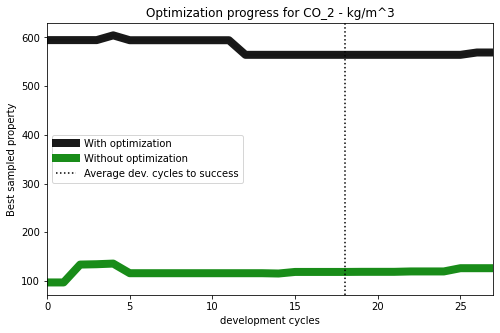

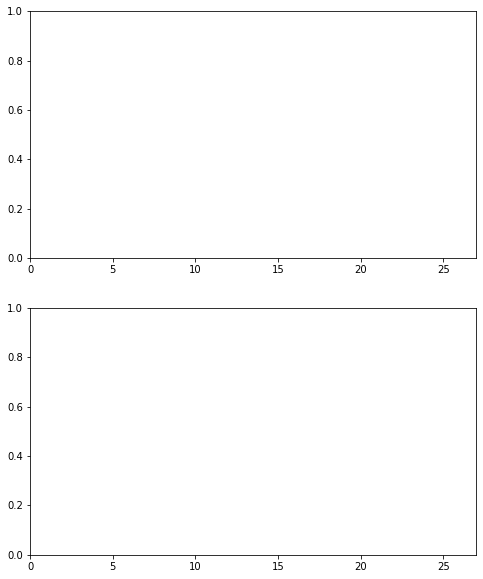

In [36]:
tab

In [37]:
np.array([[1,2],[3,4]]).ndim

2